In [47]:
import pandas as pd
data = pd.read_csv("D:/project AI_ML/time_series_traffic/data/web-traffic.csv")

In [28]:
data.head(30)

,date,users
0,1/7/20,2324
1,2/7/20,2201
2,3/7/20,2146
3,4/7/20,1666
4,5/7/20,1433
5,6/7/20,2195
6,7/7/20,2240
7,8/7/20,2295
8,9/7/20,2279
9,10/7/20,2155


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    421 non-null    object
 1   users   421 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


In [48]:
data['users'].mean()

np.float64(2791.6603325415676)

In [30]:
data["date"] = pd.to_datetime(data["date"], format="%d/%m/%y")

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    421 non-null    datetime64[ns]
 1   users   421 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [33]:
data = data.set_index("date")

# Tạo range ngày đầy đủ từ min đến max
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq="D")

# Reindex data for fill missing value
data = data.reindex(full_range)


In [35]:
data.index.min()

Timestamp('2020-07-01 00:00:00')

In [36]:
data.index.max()

Timestamp('2021-08-25 00:00:00')

In [39]:
data

,users
date,
2020-07-01,2324
2020-07-02,2201
2020-07-03,2146
2020-07-04,1666
2020-07-05,1433
...,...
2021-08-21,1546
2021-08-22,1393
2021-08-23,2371


In [43]:
data = data.reset_index()

In [44]:
data

,date,users
0,2020-07-01,2324
1,2020-07-02,2201
2,2020-07-03,2146
3,2020-07-04,1666
4,2020-07-05,1433
...,...,...
416,2021-08-21,1546
417,2021-08-22,1393
418,2021-08-23,2371
419,2021-08-24,2547


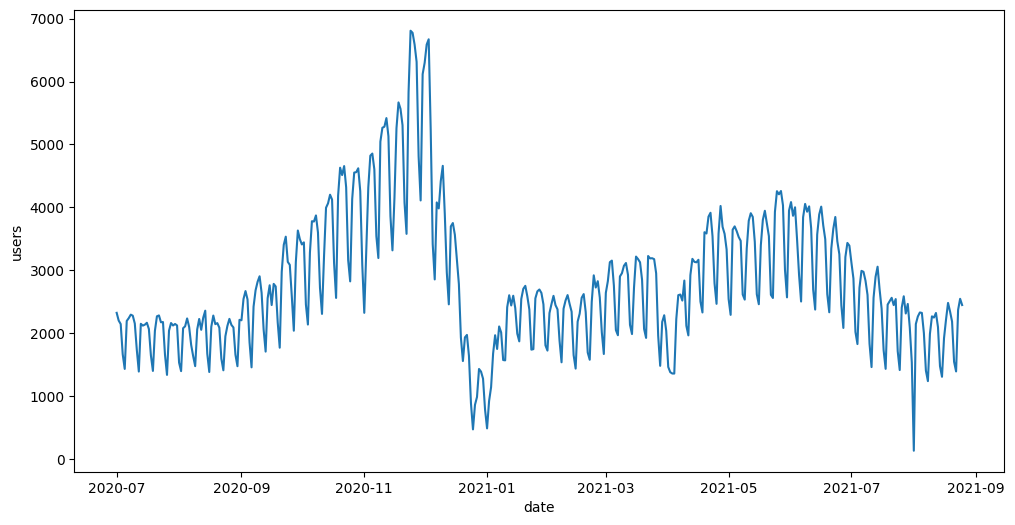

In [45]:
import matplotlib.pyplot as plt
data_reset = data.reset_index()
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data["date"], data["users"])
ax.set_xlabel("date")
ax.set_ylabel("users")
plt.show()

In [46]:
nan_count = data["users"].isna().sum()
print(nan_count)

0


In [ ]:
# function extract data
def extract_data(data, window_size = 5):
    i = 1
    while i < window_size:
        data["co2_{}".format(i)] = data["co2"].shift(-i)
        i+= 1
    data['target'] = data['co2'].shift(-i)
    data = data.dropna(axis = 0)
    return data